# Gravitational Waves from GRBs

## 1. Mass-Frequency Relation

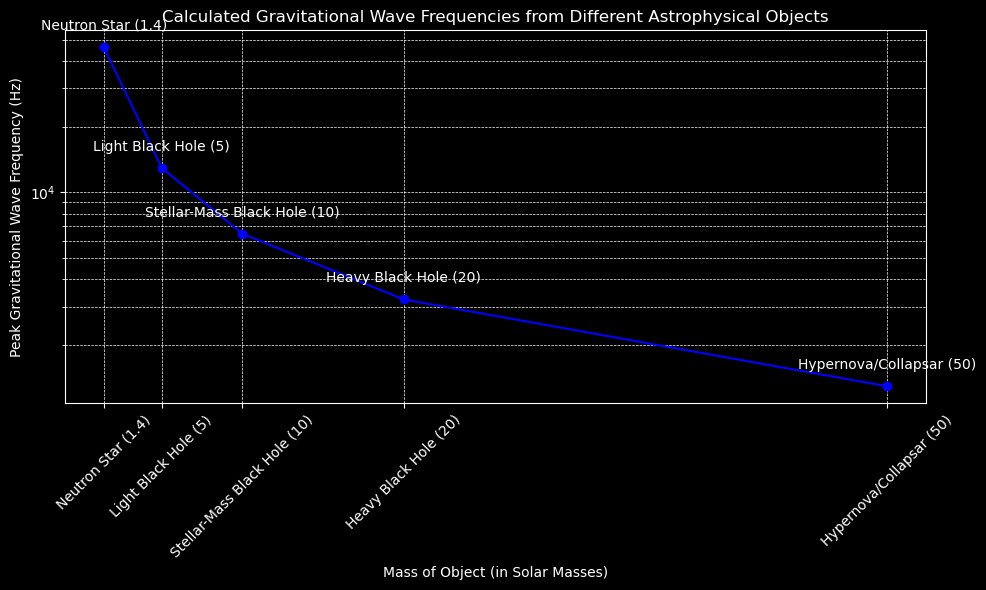

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
G = 6.674e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 3.0e8  # Speed of light (m/s)
M_sun = 1.989e30  # Solar mass in kg

# Data: Masses (in solar masses)
masses = np.array([1.4, 5, 10, 20, 50])  # Solar masses
labels = [
    "Neutron Star (1.4)",
    "Light Black Hole (5)",
    "Stellar-Mass Black Hole (10)",
    "Heavy Black Hole (20)",
    "Hypernova/Collapsar (50)"
]

frequencies = (c**3 / (G * (masses * M_sun))) / np.pi  # Hz

# Plot
plt.figure(figsize=(10, 6))
plt.plot(masses, frequencies, marker='o', linestyle='-', color='b')

for i, label in enumerate(labels):
    plt.text(masses[i], frequencies[i] * 1.2, label, ha='center', fontsize=10)
    
plt.xlabel("Mass of Object (in Solar Masses)")
plt.ylabel("Peak Gravitational Wave Frequency (Hz)")
plt.title("Calculated Gravitational Wave Frequencies from Different Astrophysical Objects")
plt.yscale('log')
plt.xticks(masses, labels, rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## 2 $m_1$-$m_2$-$f$ Relation
### Using $f_{ISCO}$ formula being $f_{ISCO} = \frac{c^3}{6^{1.5} \times \pi G M_{total}}$.

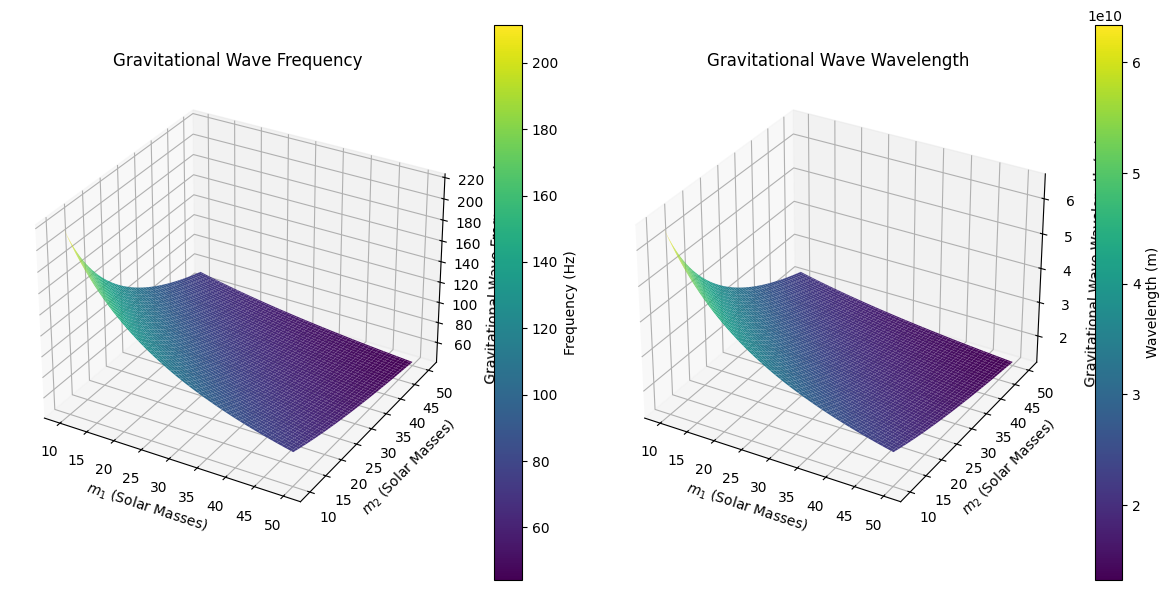

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
c = 299791458  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # Solar mass in kg

# Mass range (in solar masses) for m1 and m2
m1_range = np.linspace(10, 50, 100)  # Mass of object 1 in solar masses
m2_range = np.linspace(10, 50, 100)  # Mass of object 2 in solar masses

# Meshgrid for m1 and m2 values
M1, M2 = np.meshgrid(m1_range, m2_range)

# Calculate total mass for each (m1, m2) pair and the ISCO frequency in Hz
M_total = (M1 + M2) * M_sun  # Convert to kg
f_ISCO = (c**3) / (6**1.5 * np.pi * G * M_total)  # ISCO frequency formula
# f_ISCO = np.log((c**3) / (6**1.5 * np.pi * G * M_total)) # logarithmic scale
wavelength = c * f_ISCO

# === figure ===
fig = plt.figure(figsize=(12, 6))

# Frequency subplot
ax = fig.add_subplot(121, projection='3d')
surf_f = ax.plot_surface(M1, M2, f_ISCO, cmap='viridis', edgecolor='none')
ax.set_xlabel(r"$m_1$ (Solar Masses)")
ax.set_ylabel(r"$m_2$ (Solar Masses)")
ax.set_zlabel("Gravitational Wave Frequency (Hz)")
ax.set_title("Gravitational Wave Frequency")
fig.colorbar(surf_f, ax=ax, label="Frequency (Hz)")

# Wavelength subplot
ax2 = fig.add_subplot(122, projection='3d')
surf_lambda = ax2.plot_surface(M1, M2, wavelength, cmap='viridis', edgecolor='none')
ax2.set_xlabel(r"$m_1$ (Solar Masses)")
ax2.set_ylabel(r"$m_2$ (Solar Masses)")
ax2.set_zlabel("Gravitational Wave Wavelength (m)")
ax2.set_title("Gravitational Wave Wavelength")
fig.colorbar(surf_lambda, ax=ax2, label="Wavelength (m)")

plt.tight_layout()
plt.show()


## 3.1 $m_1$-$m_2$-E Relation
Computing the relation between the merger body massas and electromagnetic counterpart energy range (often in the X-ray and/or $\gamma$-ray regime). The energy is given by the equation\
$
E_\gamma = k_B T_{eff}
$\
Where $k_b$ is the Boltzmann constant ($8.617 \times 10^{-5} ev/K$) and $T_{eff}$ the effective energy released by the merger's ejecta, defined as:\
$
T_{eff} \approx \left(\frac{E_{em}}{aV} \right)^{\frac{1}{4}} \\
$\
where $E_{em}$ is the electromagnetic energy output, often estimated as a fraction ($\epsilon \sim 10^{-3}$) of the total gravitational binding energy of the system, $a$ is the radiation constant ($7.56 \times 10^{-16} J m^{-3} K^{-4}$), and $V$ is the expansion volume of the ejecte given by $V \sim (c t_{diff})^3$ where $t_{diff}$ is the diffusion time for photons to espace the ejecta, estimated using the ejecta mass $M_{ej}$.

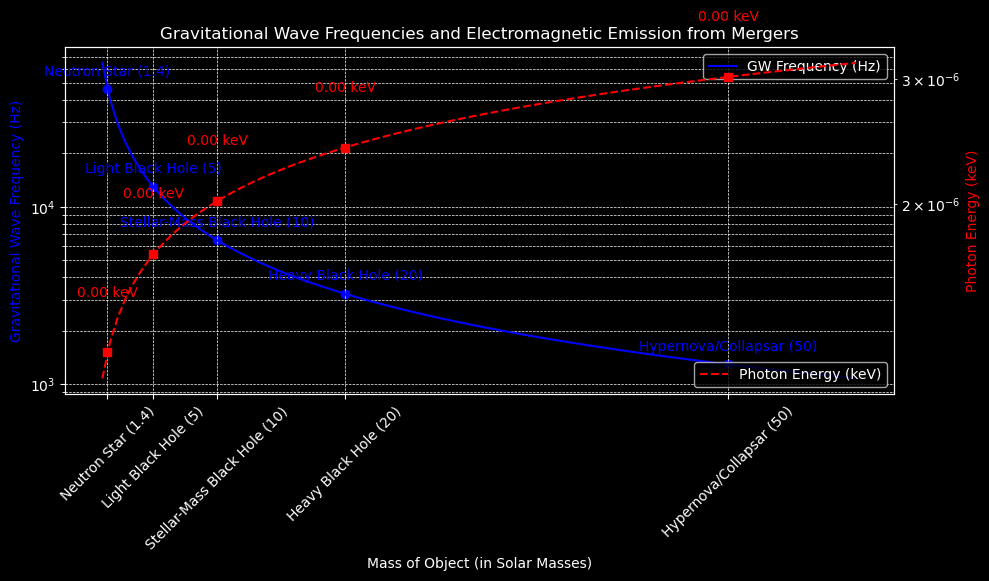

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
G = 6.674e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 3.0e8  # Speed of light (m/s)
M_sun = 1.989e30  # Solar mass in kg
k_B = 8.617e-5  # Boltzmann constant (eV/K)
a_rad = 7.56e-16  # Radiation constant (J m^-3 K^-4)

# Function to compute gravitational wave frequency
def gravitational_wave_frequency(masses):
    return (c**3 / (G * (masses * M_sun))) / np.pi  # Hz

# Function to compute photon energy range in keV
def merger_photon_energy(m1, m2):
    E_binding = G * m1 * m2 * M_sun**2 / (c * M_sun)  # Binding energy in Joules
    E_em = 1e-3 * E_binding  # Fraction of energy emitted electromagnetically
    V = (c * 1e-2)**3  # Approximate expansion volume (assuming t_diff ~ 1e-2 s)
    T_eff = (E_em / (a_rad * V))**0.25  # Effective temperature
    E_gamma = k_B * T_eff * 1e-3  # Convert to keV
    return E_gamma

# Data: Masses (in solar masses)
masses = np.array([1.4, 5, 10, 20, 50])  # Discrete points
masses_continuous = np.linspace(1, 60, 100)  # Continuous range for smooth curves

labels = [
    "Neutron Star (1.4)", "Light Black Hole (5)", "Stellar-Mass Black Hole (10)",
    "Heavy Black Hole (20)", "Hypernova/Collapsar (50)"
]

# Compute gravitational wave frequency
frequencies = gravitational_wave_frequency(masses)
frequencies_continuous = gravitational_wave_frequency(masses_continuous)

# Compute photon energy range for NS-NS and NS-BH mergers
photon_energies = [merger_photon_energy(m, 1.4) for m in masses]  # keV
photon_energies_continuous = [merger_photon_energy(m, 1.4) for m in masses_continuous]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(masses_continuous, frequencies_continuous, linestyle='-', color='b', label="GW Frequency (Hz)")
ax1.scatter(masses, frequencies, color='b', marker='o')
ax2.plot(masses_continuous, photon_energies_continuous, linestyle='--', color='r', label="Photon Energy (keV)")
ax2.scatter(masses, photon_energies, color='r', marker='s')

# Adding labels for each type of object
for i, label in enumerate(labels):
    ax1.text(masses[i], frequencies[i] * 1.2, label, ha='center', fontsize=10, color='b')
    ax2.text(masses[i], photon_energies[i] * 1.2, f"{photon_energies[i]:.2f} keV", ha='center', fontsize=10, color='r')

# Labels and titles
ax1.set_xlabel("Mass of Object (in Solar Masses)")
ax1.set_ylabel("Gravitational Wave Frequency (Hz)", color='b')
ax2.set_ylabel("Photon Energy (keV)", color='r')
plt.title("Gravitational Wave Frequencies and Electromagnetic Emission from Mergers")
ax1.set_yscale('log')  # Log scale for better visualization
ax2.set_yscale('log')

# Customizing ticks and grid for clarity
ax1.set_xticks(masses)
ax1.set_xticklabels(labels, rotation=45)
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()


# only the energies

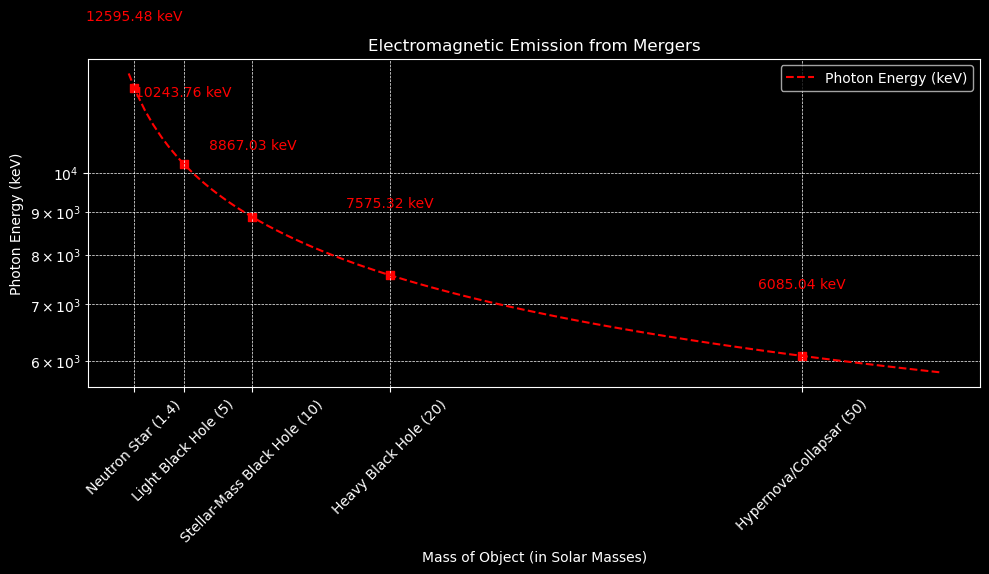

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 2.99792458e8  # Speed of light (m/s)
M_sun = 1.98847e30  # Solar mass in kg
k_B = 1.380649e-23  # Boltzmann constant (J/K)
h = 6.62607015e-34  # Planck's constant (J s)
sigma_SB = 5.670374419e-8  # Stefan-Boltzmann constant (W m^-2 K^-4)

# Function to compute photon energy range in keV using precise physics
def merger_photon_energy(m1, m2):
    M_total = (m1 + m2) * M_sun  # Total mass in kg
    E_rad = 0.1 * M_total * c**2  # Assume 10% of mass is radiated in GW and EM waves
    R_merger = 3 * G * M_total / c**2  # Approximate Schwarzschild radius of remnant
    T_peak = (E_rad / (4 * np.pi * R_merger**2 * sigma_SB))**0.25  # Peak temperature from Stefan-Boltzmann law
    E_gamma = (k_B * T_peak) / (1.60218e-16)  # Convert to keV
    return E_gamma

# Data: Masses (in solar masses)
masses = np.array([1.4, 5, 10, 20, 50])  # Discrete points
masses_continuous = np.linspace(1, 60, 100)  # Continuous range for smooth curves

labels = [
    "Neutron Star (1.4)", "Light Black Hole (5)", "Stellar-Mass Black Hole (10)",
    "Heavy Black Hole (20)", "Hypernova/Collapsar (50)"
]

# Compute photon energy range for NS-NS and NS-BH mergers
photon_energies = [merger_photon_energy(m, 1.4) for m in masses]  # keV
photon_energies_continuous = [merger_photon_energy(m, 1.4) for m in masses_continuous]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(masses_continuous, photon_energies_continuous, linestyle='--', color='r', label="Photon Energy (keV)")
plt.scatter(masses, photon_energies, color='r', marker='s')

# Adding labels for each type of object
for i, label in enumerate(labels):
    plt.text(masses[i], photon_energies[i] * 1.2, f"{photon_energies[i]:.2f} keV", ha='center', fontsize=10, color='r')

# Labels and titles
plt.xlabel("Mass of Object (in Solar Masses)")
plt.ylabel("Photon Energy (keV)")
plt.title("Electromagnetic Emission from Mergers")
plt.yscale('log')  # Log scale for better visualization

# Customizing ticks and grid for clarity
plt.xticks(masses, labels, rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


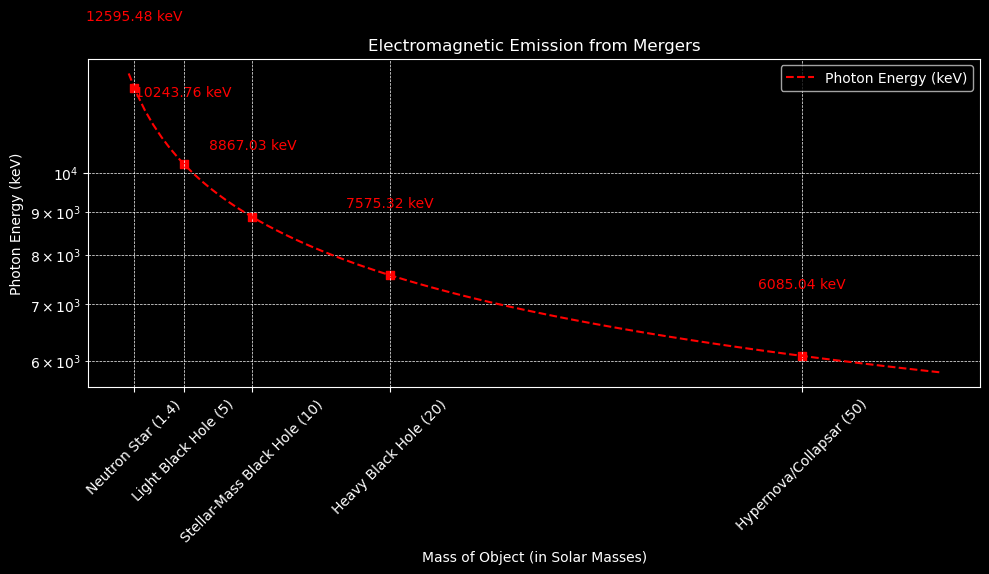

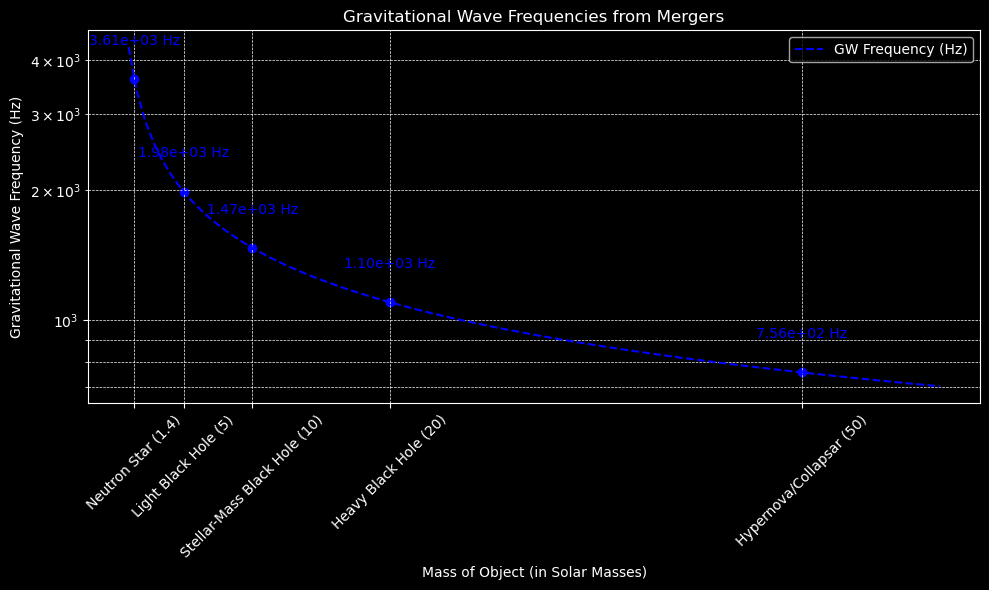

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 2.99792458e8  # Speed of light (m/s)
M_sun = 1.98847e30  # Solar mass in kg
k_B = 1.380649e-23  # Boltzmann constant (J/K)
h = 6.62607015e-34  # Planck's constant (J s)
sigma_SB = 5.670374419e-8  # Stefan-Boltzmann constant (W m^-2 K^-4)

# Function to compute gravitational wave frequency
def gw_frequency(m1, m2):
    M_chirp = ((m1 * m2)**(3/5) / (m1 + m2)**(1/5)) * M_sun  # Chirp mass in kg
    f_gw = (c**3 / (G * M_chirp)) * (1 / (np.pi * 6**(3/2)))  # GW peak frequency (Hz)
    return f_gw

# Function to compute photon energy range in keV using precise physics
def merger_photon_energy(m1, m2):
    M_total = (m1 + m2) * M_sun  # Total mass in kg
    E_rad = 0.1 * M_total * c**2  # Assume 10% of mass is radiated in GW and EM waves
    R_merger = 3 * G * M_total / c**2  # Approximate Schwarzschild radius of remnant
    T_peak = (E_rad / (4 * np.pi * R_merger**2 * sigma_SB))**0.25  # Peak temperature from Stefan-Boltzmann law
    E_gamma = (k_B * T_peak) / (1.60218e-16)  # Convert to keV
    return E_gamma

# Data: Masses (in solar masses)
masses = np.array([1.4, 5, 10, 20, 50])  # Discrete points
masses_continuous = np.linspace(1, 60, 100)  # Continuous range for smooth curves

labels = [
    "Neutron Star (1.4)", "Light Black Hole (5)", "Stellar-Mass Black Hole (10)",
    "Heavy Black Hole (20)", "Hypernova/Collapsar (50)"
]

# Compute photon energy and GW frequency for different merger scenarios
photon_energies = [merger_photon_energy(m, 1.4) for m in masses]  # keV
photon_energies_continuous = [merger_photon_energy(m, 1.4) for m in masses_continuous]
gw_frequencies = [gw_frequency(m, 1.4) for m in masses]  # Hz
gw_frequencies_continuous = [gw_frequency(m, 1.4) for m in masses_continuous]

# Plot Photon Energies
plt.figure(figsize=(10, 6))
plt.plot(masses_continuous, photon_energies_continuous, linestyle='--', color='r', label="Photon Energy (keV)")
plt.scatter(masses, photon_energies, color='r', marker='s')
for i, label in enumerate(labels):
    plt.text(masses[i], photon_energies[i] * 1.2, f"{photon_energies[i]:.2f} keV", ha='center', fontsize=10, color='r')
plt.xlabel("Mass of Object (in Solar Masses)")
plt.ylabel("Photon Energy (keV)")
plt.title("Electromagnetic Emission from Mergers")
plt.yscale('log')
plt.xticks(masses, labels, rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Gravitational Wave Frequencies
plt.figure(figsize=(10, 6))
plt.plot(masses_continuous, gw_frequencies_continuous, linestyle='--', color='b', label="GW Frequency (Hz)")
plt.scatter(masses, gw_frequencies, color='b', marker='o')
for i, label in enumerate(labels):
    plt.text(masses[i], gw_frequencies[i] * 1.2, f"{gw_frequencies[i]:.2e} Hz", ha='center', fontsize=10, color='b')
plt.xlabel("Mass of Object (in Solar Masses)")
plt.ylabel("Gravitational Wave Frequency (Hz)")
plt.title("Gravitational Wave Frequencies from Mergers")
plt.yscale('log')
plt.xticks(masses, labels, rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Other events

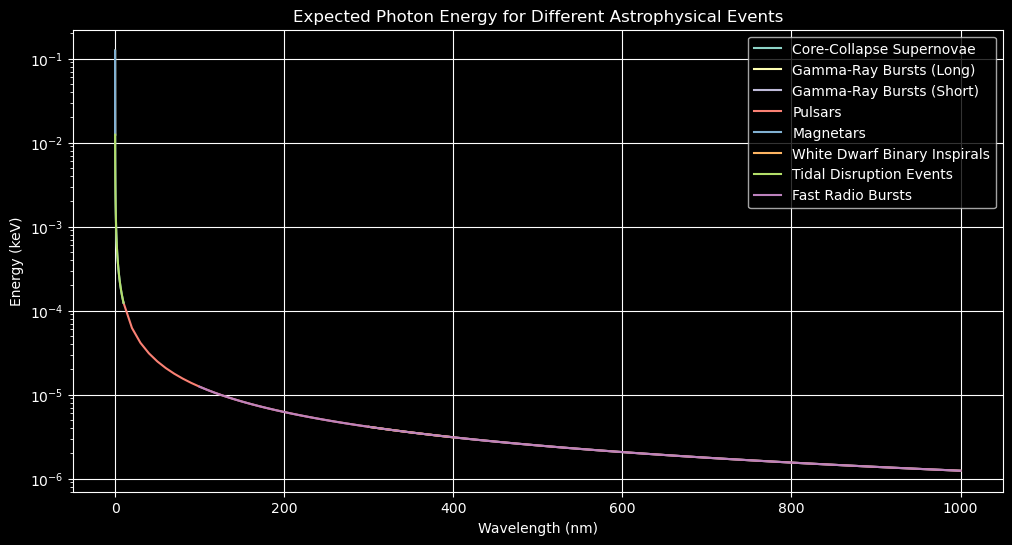

Average energy for Core-Collapse Supernovae: 0.00 keV
Average energy for Gamma-Ray Bursts (Long): 0.03 keV
Average energy for Gamma-Ray Bursts (Short): 0.03 keV
Average energy for Pulsars: 0.00 keV
Average energy for Magnetars: 0.00 keV
Average energy for White Dwarf Binary Inspirals: 0.00 keV
Average energy for Tidal Disruption Events: 0.00 keV
Average energy for Fast Radio Bursts: 0.00 keV


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck's constant in J·s
c = 3e8  # Speed of light in m/s
keV_to_J = 1.60218e-16  # Conversion factor from keV to Joules

# Function to calculate energy from wavelength (in nm) to keV
def energy_from_wavelength(wavelength_nm):
    wavelength_m = wavelength_nm * 1e-9  # Convert wavelength from nm to m
    energy_J = (h * c) / wavelength_m  # Energy in Joules
    energy_keV = energy_J / keV_to_J / 1e3  # Convert to keV
    return energy_keV

# Define the wavelength ranges (in nm) for each astrophysical event
# Typical ranges of electromagnetic emissions (in nm)

events_wavelengths = {
    "Core-Collapse Supernovae": (300, 1000),  # Visible to near UV
    "Gamma-Ray Bursts (Long)": (0.01, 0.1),  # Gamma rays
    "Gamma-Ray Bursts (Short)": (0.01, 0.1),  # Gamma rays
    "Pulsars": (10, 1000),  # Radio to X-rays
    "Magnetars": (0.01, 10),  # X-rays to Gamma-rays
    "White Dwarf Binary Inspirals": (300, 400),  # Optical and UV
    "Tidal Disruption Events": (0.1, 10),  # X-rays to UV
    "Fast Radio Bursts": (100, 1000),  # Radio waves
}

# Dictionary to store the computed energies for each event
event_energies = {}

plt.figure(figsize=(12,6))
# Loop over the events and calculate the energy at the specified wavelength range
for event, (wavelength_min, wavelength_max) in events_wavelengths.items():
    # Wavelength range in nm
    wavelengths = np.linspace(wavelength_min, wavelength_max, 100)
    
    # Compute the energies for the entire wavelength range (in keV)
    energies = energy_from_wavelength(wavelengths)
    
    # Store the average energy for each event
    average_energy = np.mean(energies)
    event_energies[event] = average_energy
    
    # Plotting the energy as a function of wavelength for each event
    plt.plot(wavelengths, energies, label=event)

# Set up the plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("Energy (keV)")
plt.title("Expected Photon Energy for Different Astrophysical Events")
plt.legend(loc="upper right")
plt.grid(True)
plt.yscale('log')
plt.show()

# Output the average energies for each event
for event, energy in event_energies.items():
    print(f"Average energy for {event}: {energy:.2f} keV")
